**Hi. This is the notebook used to complete my Coursera IBM data Science Professional Certificate capstone project (Week 05).**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import requests
import json
from pandas.io.json import json_normalize

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV, LassoCV, LassoLarsCV
from sklearn import preprocessing 

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Get data, set up a dataframe for clean-up

In [2]:
#The following is a list of NYC zip codes sourced from https://www.kaggle.com/kimjinyoung/nyc-borough-zip

zip_list = {'Zip Code': [10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10015,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10041,10044,10045,10048,10055,10060,10069,10090,10095,10098,10099,10103,10104,10105,10106,10107,10110,10111,10112,10115,10118,10119,10120,10121,10122,10123,10128,10151,10152,10153,10154,10155,10158,10161,10162,10165,10166,10167,10168,10169,10170,10171,10172,10173,10174,10175,10176,10177,10178,10199,10270,10271,10278,10279,10280,10281,10282,10301,10302,10303,10304,10305,10306,10307,10308,10309,10310,10311,10312,10314,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10474,10475,11004,11101,11102,11103,11104,11105,11106,11109,11201,11203,11204,11205,11206,11207,11208,11209,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11228,11229,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239,11241,11242,11243,11249,11252,11256,11351,11354,11355,11356,11357,11358,11359,11360,11361,11362,11363,11364,11365,11366,11367,11368,11369,11370,11371,11372,11373,11374,11375,11377,11378,11379,11385,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11426,11427,11428,11429,11430,11432,11433,11434,11435,11436,11691,11692,11693,11694,11697]}
zip_df = pd.DataFrame(zip_list)

Now let's get longitude and latitude data for these zip codes.

In [ ]:
!wget -q -O zipcodes.csv https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data 
print('Data downloaded!')

In [3]:
df_codes = pd.read_csv('zipcodes.csv')

In [ ]:
df_codes

Find the latitude and longitude for each entry from the CSV dataframe.

In [4]:
zip_df['Latitude'] = 'n/a'
zip_df['Longitude'] = 'n/a'
x1, y1 = zip_df.shape
x2, y2 = df_codes.shape
for i in range(x1):
  for j in range(x2):
    if zip_df['Zip Code'].iloc[i] == df_codes['ZIP'].iloc[j]:
      zip_df['Latitude'].iloc[i] = df_codes['LAT'].iloc[j]
      zip_df['Longitude'].iloc[i] = df_codes['LNG'].iloc[j]

C:\Users\Christopher\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Drop all entries for zip codes without a location (unassigned zips).

In [5]:
x, y = zip_df.shape
droplist = []
for i in range(x):
  if zip_df['Latitude'].iloc[i] == 'n/a':
    droplist.append(i)
zip_df = zip_df.drop(droplist)
zip_df = zip_df.reset_index()
del zip_df['index']
zip_df

Zip Code Latitude Longitude
0       10001  40.7506  -73.9972
1       10002  40.7158  -73.9862
2       10003  40.7318  -73.9892
3       10004  40.6886  -74.0182
4       10005   40.706  -74.0088
5       10006  40.7096   -74.013
6       10007  40.7138  -74.0078
7       10009  40.7264  -73.9786
8       10010  40.7391  -73.9823
9       10011   40.742  -74.0006
10      10012  40.7256  -73.9981
11      10013  40.7201  -74.0049
12      10014   40.734  -74.0067
13      10016  40.7452  -73.9783
14      10017  40.7524  -73.9725
15      10018  40.7553  -73.9931
16      10019  40.7658  -73.9872
17      10020  40.7582  -73.9788
18      10021  40.7693  -73.9588
19      10022  40.7586  -73.9679
20      10023  40.7759  -73.9826
21      10024  40.7985  -73.9744
22      10025  40.7986  -73.9666
23      10026  40.8024  -73.9527
24      10027  40.8114  -73.9531
25      10028  40.7764  -73.9535
26      10029  40.7918   -73.944
27      10030  40.8183  -73.9429
28      10031  40.8253    -73.95
29      10032  40.8388  -73.9428
30      10033  40.8505   -73.934
31      10034  40.8671  -73.9243
32      10035  40.7955  -73.9297
33      10036  40.7593  -73.9899
34      10037   40.813  -73.9374
35      10038  40.7093  -74.0026
36      10039  40.8309  -73.9362
37      10040  40.8583  -73.9305
38      10044  40.7619    -73.95
39      10069  40.7759  -73.9904
40      10103  40.7608  -73.9777
41      10110  40.7545  -73.9823
42      10111  40.7591  -73.9776
43      10112  40.7592  -73.9797
44      10115  40.8109  -73.9637
45      10119  40.7503   -73.993
46      10128  40.7814    -73.95
47      10152  40.7584   -73.972
48      10153  40.7636  -73.9724
49      10154  40.7578  -73.9725
50      10162  40.7693  -73.9499
51      10165  40.7521  -73.9787
52      10167  40.7546  -73.9748
53      10168  40.7514  -73.9771
54      10169  40.7544  -73.9761
55      10170  40.7526  -73.9759
56      10171  40.7559  -73.9739
57      10172  40.7553  -73.9743
58      10173  40.7541  -73.9794
59      10174  40.7514   -73.975
60      10177  40.7551  -73.9759
61      10199  40.7514  -73.9972
62      10271  40.7082  -74.0105
63      10278  40.7152  -74.0038
64      10279  40.7126  -74.0087
65      10280  40.7085  -74.0166
66      10282  40.7169  -74.0151
67      10301  40.6275  -74.0944
68      10302  40.6307  -74.1378
69      10303  40.6299  -74.1741
70      10304  40.6092  -74.0926
71      10305  40.5967  -74.0749
72      10306  40.5718   -74.126
73      10307  40.5092  -74.2378
74      10308  40.5519  -74.1476
75      10309  40.5313  -74.2199
76      10310  40.6326  -74.1161
77      10311  40.6052  -74.1795
78      10312  40.5452  -74.1804
79      10314  40.5993  -74.1657
80      10451  40.8205  -73.9251
81      10452  40.8374  -73.9234
82      10453  40.8528  -73.9123
83      10454  40.8055  -73.9166
84      10455  40.8147  -73.9086
85      10456  40.8299  -73.9081
86      10457  40.8471  -73.8987
87      10458  40.8625  -73.8881
88      10459  40.8259  -73.8929
89      10460  40.8418  -73.8796
90      10461  40.8474  -73.8406
91      10462  40.8433  -73.8604
92      10463  40.8807  -73.9065
93      10464  40.8678  -73.7999
94      10465  40.8226  -73.8222
95      10466   40.891  -73.8462
96      10467    40.87  -73.8657
97      10468  40.8681  -73.8997
98      10469  40.8686  -73.8481
99      10470  40.8895  -73.8727
100     10471  40.8989  -73.9033
101     10472  40.8296  -73.8693
102     10473  40.8187  -73.8585
103     10474  40.8105  -73.8844
104     10475  40.8752  -73.8238
105     11004  40.7462  -73.7115
106     11101  40.7472  -73.9398
107     11102  40.7729  -73.9263
108     11103  40.7626  -73.9134
109     11104  40.7446  -73.9202
110     11105  40.7789  -73.9068
111     11106  40.7622  -73.9315
112     11109  40.7451  -73.9569
113     11201  40.6937  -73.9897
114     11203  40.6496  -73.9344
115     11204  40.6188  -73.9848
116     11205  40.6947  -73.9663
117     11206   40.702  -73.9424
118     11207  40.6707  -73.8942
119     11208  40.6698  -73.8714
120     1120

In [6]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="NYC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_NYC = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode in zip(zip_df['Latitude'], zip_df['Longitude'], zip_df['Zip Code']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  
    
map_NYC

Use Foursquare to explore the area. 

In [7]:
CLIENT_ID = 'AVHIEHE2J0LUDCC31OZKIIWWYNLJX1121GRVWSD4CBNLLXJJ' 
CLIENT_SECRET = 'VUJLZH2IPM5KACCSBU4CXE3O3I1GGVGLSVBIUWY0GQAMHTMU'
VERSION = '20180605'

Function to pull the nearby venues from one or more given neighbourhoods. Use it to generate a dataframe of venues.

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return relevant information
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Zip Code Latitude', 
                  'Zip Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
LIMIT = 50000
NYC_venues = getNearbyVenues(names=zip_df['Zip Code'],
                                   latitudes=zip_df['Latitude'],
                                   longitudes=zip_df['Longitude']
                                  )

10001
10002
10003
10004
10005
10006
10007
10009
10010
10011
10012
10013
10014
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10044
10069
10103
10110
10111
10112
10115
10119
10128
10152
10153
10154
10162
10165
10167
10168
10169
10170
10171
10172
10173
10174
10177
10199
10271
10278
10279
10280
10282
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10314
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
11004
11101
11102
11103
11104
11105
11106
11109
11201
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11351
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
1136

In [10]:
print(NYC_venues.shape)
NYC_venues

(9997, 7)


Zip Code  Zip Code Latitude  Zip Code Longitude  \
0        10001          40.750633          -73.997177   
1        10001          40.750633          -73.997177   
2        10001          40.750633          -73.997177   
3        10001          40.750633          -73.997177   
4        10001          40.750633          -73.997177   
...        ...                ...                 ...   
9992     11697          40.555688          -73.920663   
9993     11697          40.555688          -73.920663   
9994     11697          40.555688          -73.920663   
9995     11697          40.555688          -73.920663   
9996     11697          40.555688          -73.920663   

                                     Venue  Venue Latitude  Venue Longitude  \
0                   New York Pizza Suprema       40.750124       -73.994992   
1     You Should Be Dancing…..! / Club 412       40.750306       -73.994743   
2                           Bluestone Lane       40.752068       -73.998848   
3                           Magnet Theater       40.748703       -73.995415   
4                            Panda Express       40.750301       -73.994707   
...                                    ...             ...              ...   
9992                           Pelham Walk       40.558499       -73.922276   
9993                  Ocean Ave, Breezy Pt       40.558337       -73.918602   
9994                                Dugout       40.559381       -73.919297   
9995     Breezy Point Ballfield Playground       40.559614       -73.919073   
9996                     Basketball Courts       40.559541       -73.917858   

          Venue Category  
0            Pizza Place  
1           Dance Studio  
2            Coffee Shop  
3          Indie Theater  
4     Chinese Restaurant  
...                  ...  
9992               Trail  
9993               Beach  
9994         Pizza Place  
9995                Park  
9996    Basketball Court  

[9997 rows x 7 columns]

In [11]:
#Save the data to a csv for future use if needed
NYC_venues.to_csv('NYC_venues.csv', index=False)

In [12]:
NYC_venues.groupby('Zip Code').count()

Zip Code Latitude  Zip Code Longitude  Venue  Venue Latitude  \
Zip Code                                                                 
10001                   100                 100    100             100   
10002                   100                 100    100             100   
10003                   100                 100    100             100   
10004                    34                  34     34              34   
10005                   100                 100    100             100   
10006                   100                 100    100             100   
10007                   100                 100    100             100   
10009                   100                 100    100             100   
10010                   100                 100    100             100   
10011                   100                 100    100             100   
10012                   100                 100    100             100   
10013                   100                 100    100             100   
10014                   100                 100    100             100   
10016                   100                 100    100             100   
10017                   100                 100    100             100   
10018                   100                 100    100             100   
10019                   100                 100    100             100   
10020                   100                 100    100             100   
10021                   100                 100    100             100   
10022                   100                 100    100             100   
10023                   100                 100    100             100   
10024                    48                  48     48              48   
10025                    66                  66     66              66   
10026                    59                  59     59              59   
10027                    56                  56     56              56   
10028                   100                 100    100             100   
10029                    45                  45     45              45   
10030                    66                  66     66              66   
10031                    69                  69     69              69   
10032                    42                  42     42              42   
10033                    83                  83     83              83   
10034                    86                  86     86              86   
10035                    41                  41     41              41   
10036                   100                 100    100             100   
10037                    15                  15     15              15   
10038                   100                 100    100             100   
10039                    23                  23     23              23   
10040                    23                  23     23              23   
10044                    29                  29     29              29   
10069                    43                  43     43              43   
10103                   100                 100    100             100   
10110                   100                 100    100             100   
10111                   100                 100    100             100   
10112                   100                 100    100             100   
10115                    42                  42     42              42   
10119                   100                 100    100             100   
10128                   100                 100    100             100   
10152                   100                 100    100             100   
10153                   100                 100    100             100   
10154                   100                 100    100             100   
10162                    81                  81     81              81   
10165                   100                 100    100             100   
10167         

Analyze each neighbourhood.

In [13]:
NYC_onehot = pd.get_dummies(NYC_venues[['Venue Category']], prefix="", prefix_sep="")
NYC_onehot['Zip Code'] = NYC_venues['Zip Code'] 
fixed_columns = [NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])
NYC_onehot = NYC_onehot[fixed_columns]
NYC_grouped = NYC_onehot.groupby('Zip Code').sum()
NYC_grouped = NYC_grouped.reset_index()
NYC_grouped

Zip Code  Accessories Store  Acupuncturist  Adult Boutique  \
0       10001                  0              0               0   
1       10002                  0              0               0   
2       10003                  0              0               0   
3       10004                  0              0               0   
4       10005                  1              0               0   
5       10006                  0              0               0   
6       10007                  0              0               0   
7       10009                  0              0               0   
8       10010                  0              0               0   
9       10011                  0              0               0   
10      10012                  1              0               0   
11      10013                  0              0               0   
12      10014                  1              0               1   
13      10016                  0              0               0   
14      10017                  0              0               0   
15      10018                  0              0               0   
16      10019                  0              0               0   
17      10020                  0              0               0   
18      10021                  0              0               0   
19      10022                  0              0               0   
20      10023                  0              0               0   
21      10024                  0              0               0   
22      10025                  0              0               0   
23      10026                  0              0               0   
24      10027                  0              0               0   
25      10028                  0              0               0   
26      10029                  0              0               0   
27      10030                  0              0               0   
28      10031                  0              0               0   
29      10032                  0              0               0   
30      10033                  1              0               0   
31      10034                  0              0               0   
32      10035                  0              0               0   
33      10036                  0              0               0   
34      10037                  0              0               0   
35      10038                  0              0               0   
36      10039                  0              0               0   
37      10040                  0              0               0   
38      10044                  0              0               0   
39      10069                  0              0               0   
40      10103                  1              0               0   
41      10110                  0              0               0   
42      10111                  1              0               0   
43      10112                  0              0               0   
44      10115                  0              0               0   
45      10119                  0              0               0   
46      10128                  0              0               0   
47      10152                  1              0               0   
48      10153                  1              0               0   
49      10154                  0              0               0   
50      10162                  0              0               0   
51      10165                  0              0               0   
52      10167                  0              0               0   
53      10168                  0              0               0   
54      10169                  0              0               0   
55      10170                  0              0               0   
56      10171                  0              0               0   
57      10172                  0              0               0   
58      10173                  0              0     

In [14]:
#Save the data to a csv for future use if needed
NYC_grouped.to_csv('NYC_grouped.csv', index=False)

Okay, let's start grouping variables

In [17]:
NYC_bycat = pd.DataFrame() #NYC_grouped.copy() #pd.DataFrame()
NYC_bycat['Zip Code'] = NYC_grouped['Zip Code']
NYC_bycat['Coffee'] = NYC_grouped['Coffee Shop']
NYC_bycat['Academic'] = NYC_grouped['Athletics & Sports']+NYC_grouped['Baseball Field']+NYC_grouped['Basketball Court']+NYC_grouped['Boxing Gym']+NYC_grouped['Climbing Gym']+NYC_grouped['Cycle Studio']+NYC_grouped['Dance Studio']+NYC_grouped['College Academic Building']+NYC_grouped['Cooking School']+NYC_grouped['School']+NYC_grouped['Library']+NYC_grouped['Music School']
NYC_bycat['Athletics'] = NYC_grouped['Yoga Studio']+NYC_grouped['Volleyball Court']+NYC_grouped['Tennis Court']+NYC_grouped['Soccer Field']+NYC_grouped['Pilates Studio']+NYC_grouped['Martial Arts Dojo']+NYC_grouped['Gym']+NYC_grouped['Gym / Fitness Center']+NYC_grouped['Gym Pool']+NYC_grouped['Gymnastics Gym']
NYC_bycat['Children'] = NYC_grouped['Daycare']+NYC_grouped['Playground']+NYC_grouped['High School']+NYC_grouped['Elementary School']
NYC_bycat['CasualFood'] = NYC_grouped['Bagel Shop']+NYC_grouped['Bakery']+NYC_grouped['Breakfast Spot']+NYC_grouped['Bubble Tea Shop']+NYC_grouped['Creperie']+NYC_grouped['Cupcake Shop']+NYC_grouped['Deli / Bodega']+NYC_grouped['Dessert Shop']+NYC_grouped['Donut Shop']+NYC_grouped['Café']+NYC_grouped['Tea Room']+NYC_grouped['Street Food Gathering']+NYC_grouped['Smoothie Shop']+NYC_grouped['Snack Place']+NYC_grouped['Pie Shop']+NYC_grouped['Pastry Shop']+NYC_grouped['Juice Bar']+NYC_grouped['Hot Dog Joint']+NYC_grouped['Ice Cream Shop']+NYC_grouped['Gourmet Shop']+NYC_grouped['Frozen Yogurt Shop']+NYC_grouped['Food Truck']+NYC_grouped['Food Stand']+NYC_grouped['Food Court']
NYC_bycat['Destination'] = NYC_grouped['Art Gallery']+NYC_grouped['Art Museum']+NYC_grouped['Auditorium']+NYC_grouped['Baseball Stadium']+NYC_grouped['Basketball Stadium']+NYC_grouped['Beach']+NYC_grouped['Concert Hall']+NYC_grouped['Tour Provider']+NYC_grouped['Zoo']+NYC_grouped['Waterfront']+NYC_grouped['Museum']+NYC_grouped['History Museum']+NYC_grouped['Science Museum']+NYC_grouped['Pier']+NYC_grouped['Resort']+NYC_grouped['Racetrack']+NYC_grouped['Performing Arts Venue']+NYC_grouped['Opera House']+NYC_grouped['Monument / Landmark']+NYC_grouped['Memorial Site']+NYC_grouped['Island']+NYC_grouped['Historic Site']+NYC_grouped['Golf Course']+NYC_grouped['Exhibit']+NYC_grouped['Event Space']
NYC_bycat['Entertainment'] = NYC_grouped['Arcade']+NYC_grouped['Bowling Alley']+NYC_grouped['Sports Club']+NYC_grouped['Spa']+NYC_grouped['Tennis Stadium']+NYC_grouped['Theater']+NYC_grouped['Theme Park']+NYC_grouped['Theme Park Ride / Attraction']+NYC_grouped['Skating Rink']+NYC_grouped['Pool']+NYC_grouped['Rock Club']+NYC_grouped['Roller Rink']+NYC_grouped['Recreation Center']+NYC_grouped['Music Venue']+NYC_grouped['Multiplex']+NYC_grouped['Movie Theater']+NYC_grouped['Mini Golf']+NYC_grouped['Indie Theater']+NYC_grouped['Indie Movie Theater']+NYC_grouped['General Entertainment']
NYC_bycat['Housing'] = NYC_grouped['Bed & Breakfast']+NYC_grouped['Residential Building (Apartment / Condo)']+NYC_grouped['Neighborhood']+NYC_grouped['Motel']+NYC_grouped['Hotel']+NYC_grouped['Hostel']
NYC_bycat['Nightlife'] = NYC_grouped['Bar']+NYC_grouped['Beach Bar']+NYC_grouped['Beer Bar']+NYC_grouped['Brewery']+NYC_grouped['Cocktail Bar']+NYC_grouped['Comedy Club']+NYC_grouped['Dive Bar']+NYC_grouped['Whisky Bar']+NYC_grouped['Wine Bar']+NYC_grouped['Tiki Bar']+NYC_grouped['Strip Club']+NYC_grouped['Sports Bar']+NYC_grouped['Speakeasy']+NYC_grouped['Sake Bar']+NYC_grouped['Pool Hall']+NYC_grouped['Piano Bar']+NYC_grouped['Other Nightlife']+NYC_grouped['Nightclub']+NYC_grouped['Lounge']+NYC_grouped['Karaoke Bar']+NYC_grouped['Jazz Club']+NYC_grouped['Hotel Bar']+NYC_grouped['Hookah Bar']+NYC_grouped['Gay Bar']
NYC_bycat['Office'] = NYC_grouped['Coworking Space']+NYC_grouped['Design Studio']+NYC_grouped['Veterinarian']+NYC_grouped['Pharmacy']+NYC_grouped['Physical Therapist']+NYC_grouped['Medical Center']+NYC_grouped['Acupuncturist']+NYC_grouped["Doctor's Office"]+NYC_grouped['TV Station']+NYC_grouped['Tech Startup']+NYC_grouped['Recording Studio']+NYC_grouped['Photography Studio']+NYC_grouped['Office']+NYC_grouped['Non-Profit']+NYC_grouped['Lawyer']+NYC_grouped['Industrial Estate']+NYC_grouped['IT Services']+NYC_grouped['Factory']+NYC_grouped['Film Studio']
NYC_bycat['OutDoor'] = NYC_grouped['Bike Trail']+NYC_grouped['Campground']+NYC_grouped['Dog Run']+NYC_grouped['Trail']+NYC_grouped['Tree']+NYC_grouped['Street Art']+NYC_grouped['State / Provincial Park']+NYC_grouped['Plaza']+NYC_grouped['Sculpture Garden']+NYC_grouped['Scenic Lookout']+NYC_grouped['River']+NYC_grouped['Public Art']+NYC_grouped['Outdoors & Recreation']+NYC_grouped['Park']+NYC_grouped['Outdoor Sculpture']+NYC_grouped['Other Great Outdoors']+NYC_grouped['Harbor / Marina']+NYC_grouped['Garden Center']+NYC_grouped['Garden']+NYC_grouped['Fountain']+NYC_grouped['Field']+NYC_grouped['Fishing Spot']
NYC_bycat['Religious'] = NYC_grouped['Church']+NYC_grouped['Synagogue']
NYC_bycat['Restaurant'] = NYC_grouped['Afghan Restaurant']+NYC_grouped['African Restaurant']+NYC_grouped['American Restaurant']+NYC_grouped['Arepa Restaurant']+NYC_grouped['Argentinian Restaurant']+NYC_grouped['Asian Restaurant']+NYC_grouped['Australian Restaurant']+NYC_grouped['Austrian Restaurant']+NYC_grouped['BBQ Joint']+NYC_grouped['Beer Garden']+NYC_grouped['Bistro']+NYC_grouped['Brazilian Restaurant']+NYC_grouped['Buffet']+NYC_grouped['Burger Joint']+NYC_grouped['Burrito Place']+NYC_grouped['Cafeteria']+NYC_grouped['Cajun / Creole Restaurant']+NYC_grouped['Cantonese Restaurant']+NYC_grouped['Caribbean Restaurant']+NYC_grouped['Caucasian Restaurant']+NYC_grouped['Chinese Restaurant']+NYC_grouped['Churrascaria']+NYC_grouped['Colombian Restaurant']+NYC_grouped['Comfort Food Restaurant']+NYC_grouped['Cuban Restaurant']+NYC_grouped['Czech Restaurant']+NYC_grouped['Dim Sum Restaurant']+NYC_grouped['Diner']+NYC_grouped['Dumpling Restaurant']+NYC_grouped['Vietnamese Restaurant']+NYC_grouped['Wings Joint']+NYC_grouped['Vegetarian / Vegan Restaurant']+NYC_grouped['Venezuelan Restaurant']+NYC_grouped['Turkish Restaurant']+NYC_grouped['Udon Restaurant']+NYC_grouped['Ukrainian Restaurant']+NYC_grouped['Tonkatsu Restaurant']+NYC_grouped['Thai Restaurant']+NYC_grouped['Tex-Mex Restaurant']+NYC_grouped['Tapas Restaurant']+NYC_grouped['Taiwanese Restaurant']+NYC_grouped['Taco Place']+NYC_grouped['Szechuan Restaurant']+NYC_grouped['Sushi Restaurant']+NYC_grouped['Swiss Restaurant']+NYC_grouped['Steakhouse']+NYC_grouped['Spanish Restaurant']+NYC_grouped['Southern / Soul Food Restaurant']+NYC_grouped['South Indian Restaurant']+NYC_grouped['South American Restaurant']+NYC_grouped['Soup Place']+NYC_grouped['Soba Restaurant']+NYC_grouped['Seafood Restaurant']+NYC_grouped['Shabu-Shabu Restaurant']+NYC_grouped['Shanghai Restaurant']+NYC_grouped['Scandinavian Restaurant']+NYC_grouped['Sandwich Place']+NYC_grouped['Salvadoran Restaurant']+NYC_grouped['Salad Place']+NYC_grouped['Russian Restaurant']+NYC_grouped['Restaurant']+NYC_grouped['Ramen Restaurant']+NYC_grouped['Pub']+NYC_grouped['Poke Place']+NYC_grouped['Polish Restaurant']+NYC_grouped['Pizza Place']+NYC_grouped['Pet Café']+NYC_grouped['Persian Restaurant']+NYC_grouped['Peruvian Restaurant']+NYC_grouped['Peking Duck Restaurant']+NYC_grouped['Paella Restaurant']+NYC_grouped['Pakistani Restaurant']+NYC_grouped['North Indian Restaurant']+NYC_grouped['Noodle House']+NYC_grouped['New American Restaurant']+NYC_grouped['Modern European Restaurant']+NYC_grouped['Molecular Gastronomy Restaurant']+NYC_grouped['Mexican Restaurant']+NYC_grouped['Middle Eastern Restaurant']+NYC_grouped['Mediterranean Restaurant']+NYC_grouped['Malay Restaurant']+NYC_grouped['Lebanese Restaurant']+NYC_grouped['Italian Restaurant']+NYC_grouped['Japanese Curry Restaurant']+NYC_grouped['Jewish Restaurant']+NYC_grouped['Kebab Restaurant']+NYC_grouped['Korean Restaurant']+NYC_grouped['Kosher Restaurant']+NYC_grouped['Latin American Restaurant']+NYC_grouped['Japanese Restaurant']+NYC_grouped['Irish Pub']+NYC_grouped['Indonesian Restaurant']+NYC_grouped['Indian Restaurant']+NYC_grouped['Hawaiian Restaurant']+NYC_grouped['Halal Restaurant']+NYC_grouped['Greek Restaurant']+NYC_grouped['Gluten-free Restaurant']+NYC_grouped['German Restaurant']+NYC_grouped['Gastropub']+NYC_grouped['Fried Chicken Joint']+NYC_grouped['French Restaurant']+NYC_grouped['Food & Drink Shop']+NYC_grouped['Food']+NYC_grouped['Fish & Chips Shop']+NYC_grouped['Filipino Restaurant']+NYC_grouped['Fast Food Restaurant']+NYC_grouped['Falafel Restaurant']+NYC_grouped['Ethiopian Restaurant']+NYC_grouped['Eastern European Restaurant']+NYC_grouped['Empanada Restaurant']+NYC_grouped['English Restaurant']
NYC_bycat['Retail'] = NYC_grouped['Discount Store']+NYC_grouped['Clothing Store']+NYC_grouped['Comic Shop']+NYC_grouped['Cosmetics Shop']+NYC_grouped['Department Store']+NYC_grouped['Candy Store']+NYC_grouped['Cheese Shop']+NYC_grouped['Chocolate Shop']+NYC_grouped['Camera Store']+NYC_grouped['Bookstore']+NYC_grouped['Boutique']+NYC_grouped['Bridal Shop']+NYC_grouped['Big Box Store']+NYC_grouped['Bike Shop']+NYC_grouped['Board Shop']+NYC_grouped['Arts & Crafts Store']+NYC_grouped['Baby Store']+NYC_grouped['Accessories Store']+NYC_grouped['Adult Boutique']+NYC_grouped['Antique Shop']+NYC_grouped['Convenience Store']+NYC_grouped['Gas Station']+NYC_grouped['Warehouse Store']+NYC_grouped['Wine Shop']+NYC_grouped["Women's Store"]+NYC_grouped['Video Game Store']+NYC_grouped['Video Store']+NYC_grouped['Toy / Game Store']+NYC_grouped['Used Bookstore']+NYC_grouped['Thrift / Vintage Store']+NYC_grouped['Supplement Shop']+NYC_grouped['Sporting Goods Shop']+NYC_grouped['Smoke Shop']+NYC_grouped['Shopping Plaza']+NYC_grouped['Shopping Mall']+NYC_grouped['Shoe Store']+NYC_grouped['Record Shop']+NYC_grouped['Pet Store']+NYC_grouped['Perfume Shop']+NYC_grouped['Paper / Office Supplies Store']+NYC_grouped['Outlet Store']+NYC_grouped['Outdoor Supply Store']+NYC_grouped['Optical Shop']+NYC_grouped['Music Store']+NYC_grouped['Motorcycle Shop']+NYC_grouped["Men's Store"]+NYC_grouped['Miscellaneous Shop']+NYC_grouped['Mobile Phone Shop']+NYC_grouped['Luggage Store']+NYC_grouped['Mattress Store']+NYC_grouped['Leather Goods Store']+NYC_grouped['Lingerie Store']+NYC_grouped['Liquor Store']+NYC_grouped['Kids Store']+NYC_grouped['Kitchen Supply Store']+NYC_grouped['Hobby Shop']+NYC_grouped['Jewelry Store']+NYC_grouped['Hardware Store']+NYC_grouped['Gift Shop']+NYC_grouped['Electronics Store']+NYC_grouped['Furniture / Home Store']+NYC_grouped['Flower Shop']+NYC_grouped['Flea Market']
NYC_bycat['Service'] = NYC_grouped['Auto Garage']+NYC_grouped['Automotive Shop']+NYC_grouped['Bank']+NYC_grouped['Car Wash']+NYC_grouped['Check Cashing Service']+NYC_grouped['Dry Cleaner']+NYC_grouped['Business Service']+NYC_grouped['Shipping Store']+NYC_grouped['Tourist Information Center']+NYC_grouped['Massage Studio']+NYC_grouped['Tanning Salon']+NYC_grouped['Tattoo Parlor']+NYC_grouped['Tailor Shop']+NYC_grouped['Shop & Service']+NYC_grouped['Shoe Repair']+NYC_grouped['Salon / Barbershop']+NYC_grouped['Pet Service']+NYC_grouped['Nail Salon']+NYC_grouped['Home Service']+NYC_grouped['Health & Beauty Service']
NYC_bycat['Grocery'] = NYC_grouped['Beer Store']+NYC_grouped['Butcher']+NYC_grouped['Supermarket']+NYC_grouped['Organic Grocery']+NYC_grouped['Market']+NYC_grouped['Health Food Store']+NYC_grouped['Grocery Store']+NYC_grouped['Farmers Market']+NYC_grouped['Fish Market']+NYC_grouped['Fruit & Vegetable Store']
NYC_bycat['Transportation'] = NYC_grouped['Airport']+NYC_grouped['Bike Rental / Bike Share']+NYC_grouped['Boat or Ferry']+NYC_grouped['Bus Line']+NYC_grouped['Bus Station']+NYC_grouped['Train Station']+NYC_grouped['Rental Car Location']+NYC_grouped['Rental Service']+NYC_grouped['Metro Station']
NYC_bycat['Service/Utility'] = NYC_grouped['Waste Facility']+NYC_grouped['Weight Loss Center']+NYC_grouped['Storage Facility']+NYC_grouped['Post Office']+NYC_grouped['Laundromat']+NYC_grouped['Laundry Service']


In [18]:
NYC_bycat

Zip Code  Coffee  Academic  Athletics  Children  CasualFood  Destination  \
0       10001       5         6          6         0          17            3   
1       10002       6         0          1         0          15            5   
2       10003       3         2          7         0          17            0   
3       10004       1         2          1         0           9            4   
4       10005       9         1          7         0          12            4   
5       10006       5         1          5         1          12            9   
6       10007       6         3          8         1           6            2   
7       10009       5         0          3         0          10            0   
8       10010       3         0          5         1          12            2   
9       10011       6         1          5         0          18            2   
10      10012       3         0          8         1          14            2   
11      10013       3         4          9         1           7            4   
12      10014       3         1          1         0           7            1   
13      10016       4         1          5         0           8            2   
14      10017       8         2          2         0          13            1   
15      10018       8         7          5         0           4            3   
16      10019       6         1          6         0           5            2   
17      10020       2         1          3         0           9            9   
18      10021       4         3          9         1          10            1   
19      10022       4         1          4         0          15            1   
20      10023       4         2         10         2          16            7   
21      10024       1         1          4         1           8            1   
22      10025       2         0          4         1           8            0   
23      10026       5         2          1         2          11            1   
24      10027       2         0          4         1           2            1   
25      10028       3         1         11         0          15            0   
26      10029       0         1          1         0           6            1   
27      10030       1         3          2         0           9            1   
28      10031       4         1          4         0          11            1   
29      10032       1         0          0         1           4            1   
30      10033       2         0          2         0          15            0   
31      10034       2         0          1         1          14            1   
32      10035       0         1          1         0           8            1   
33      10036       2         2          1         0           8            6   
34      10037       0         2          1         0           1            0   
35      10038       4         1          4         2          17            2   
36      10039       0         3          0         0           4            3   
37      10040       1         0          0         0           1            0   
38      10044       1         1          2         0           2            1   
39      10069       1         3          8         2           3            4   
40      10103       3         0          3         0           5            7   
41      10110       4         3          6         0          10            4   
42      10111       2         1          4         0           9            8   
43      10112       2         1          2         0          11            7   
44      10115       2         0          1         0           8            2   
45      10119       4         6          6         0          12            5   
46      10128       6         1          9         1          11            1   
47      10152       6         0          5         0          11            2   
48      10153       1         0     

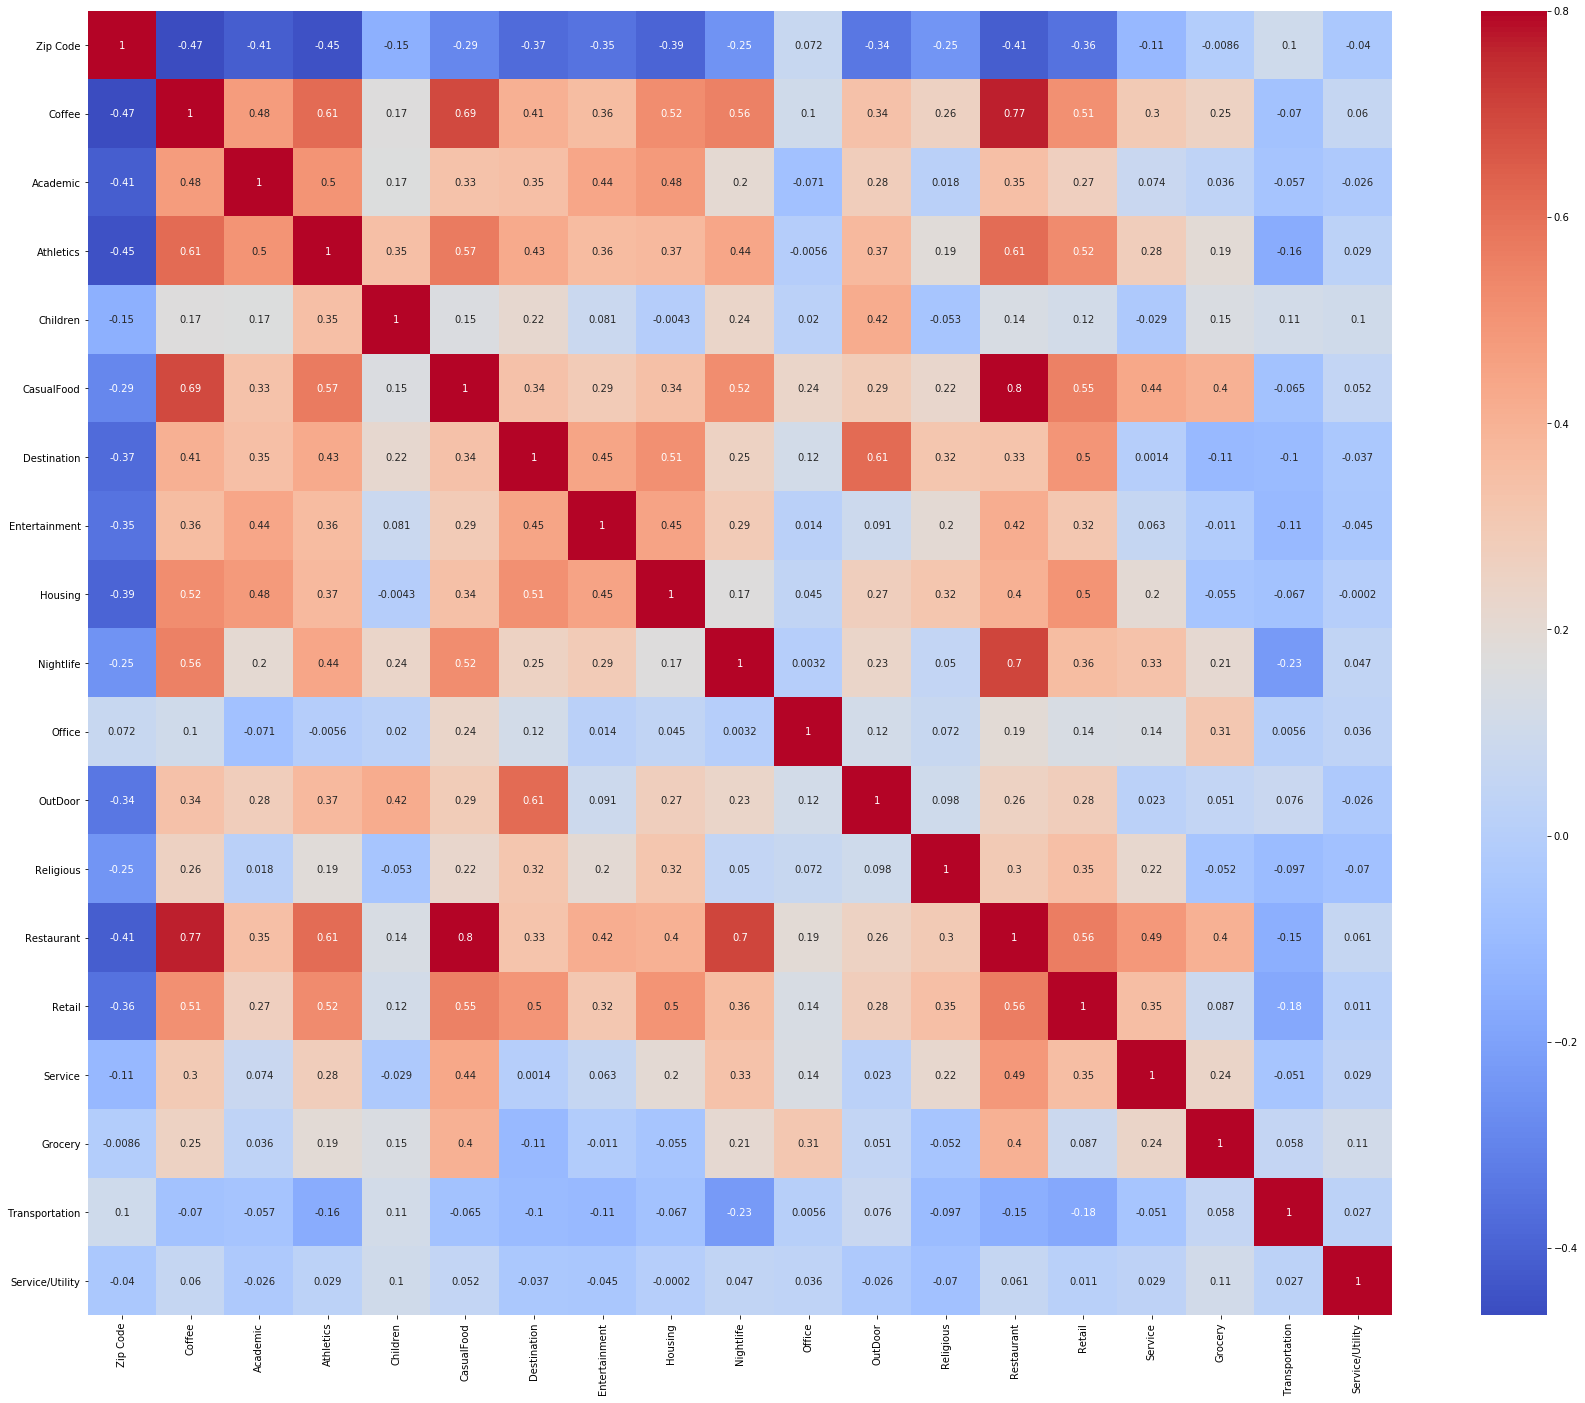

In [19]:
corrmat = NYC_bycat.corr()
f, ax = plt.subplots(figsize=(32, 24))
sns.heatmap(corrmat, vmax=.8,  annot=True, square=True, cmap= 'coolwarm');

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Zip Code']
for i in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zip Code'] = NYC_grouped['Zip Code']

for i in np.arange(NYC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[i, 1:] = return_most_common_venues(NYC_grouped.iloc[i, :], num_top_venues)

neighborhoods_venues_sorted.head()

Zip Code          1st Most Common Venue 2nd Most Common Venue  \
0     10001                   Dance Studio           Coffee Shop   
1     10002             Mexican Restaurant           Coffee Shop   
2     10003  Vegetarian / Vegan Restaurant   Japanese Restaurant   
3     10004                     Food Truck            Food Stand   
4     10005                    Coffee Shop   American Restaurant   

  3rd Most Common Venue     4th Most Common Venue 5th Most Common Venue  \
0           Music Venue                     Hotel          Burger Joint   
1          Cocktail Bar                       Bar    Chinese Restaurant   
2        Ice Cream Shop               Yoga Studio          Dessert Shop   
3        Ice Cream Shop  Bike Rental / Bike Share                Island   
4          Cocktail Bar                       Gym    Italian Restaurant   

  6th Most Common Venue 7th Most Common Venue         8th Most Common Venue  \
0                  Café           Pizza Place          Gym / Fitness Center   
1                Bakery        Sandwich Place                   Art Gallery   
2         Grocery Store        Cosmetics Shop      Mediterranean Restaurant   
3             Gift Shop      Pedestrian Plaza  Theme Park Ride / Attraction   
4    Falafel Restaurant            Steakhouse          Gym / Fitness Center   

  9th Most Common Venue 10th Most Common Venue  
0           Salad Place          Deli / Bodega  
1            Shoe Store                   Café  
2                   Bar            Coffee Shop  
3            Theme Park         Baseball Field  
4                 Hotel              Juice Bar

Now we cluster the neighborhoods by k-means.

In [21]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NYC_bycat)
kmeans.labels_[0:10] 
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
NYC_merged = zip_df
NYC_merged = NYC_merged.join(neighborhoods_venues_sorted.set_index('Zip Code'), on='Zip Code')

NYC_merged.head()

Zip Code Latitude Longitude  Cluster Labels          1st Most Common Venue  \
0     10001  40.7506  -73.9972               3                   Dance Studio   
1     10002  40.7158  -73.9862               3             Mexican Restaurant   
2     10003  40.7318  -73.9892               3  Vegetarian / Vegan Restaurant   
3     10004  40.6886  -74.0182               3                     Food Truck   
4     10005   40.706  -74.0088               3                    Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
0           Coffee Shop           Music Venue                     Hotel   
1           Coffee Shop          Cocktail Bar                       Bar   
2   Japanese Restaurant        Ice Cream Shop               Yoga Studio   
3            Food Stand        Ice Cream Shop  Bike Rental / Bike Share   
4   American Restaurant          Cocktail Bar                       Gym   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Burger Joint                  Café           Pizza Place   
1    Chinese Restaurant                Bakery        Sandwich Place   
2          Dessert Shop         Grocery Store        Cosmetics Shop   
3                Island             Gift Shop      Pedestrian Plaza   
4    Italian Restaurant    Falafel Restaurant            Steakhouse   

          8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0          Gym / Fitness Center           Salad Place          Deli / Bodega  
1                   Art Gallery            Shoe Store                   Café  
2      Mediterranean Restaurant                   Bar            Coffee Shop  
3  Theme Park Ride / Attraction            Theme Park         Baseball Field  
4          Gym / Fitness Center                 Hotel              Juice Bar

Lastly, let's visualize the clusters.

In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_merged['Latitude'], NYC_merged['Longitude'], NYC_merged['Zip Code'], NYC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Well! The clustering gives us the boroughs surprisingly well. So we probably need more clusters to be useful. 

In [23]:
kclusters = 50
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NYC_bycat)
kmeans.labels_[0:10] 
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
NYC_merged = zip_df
NYC_merged = NYC_merged.join(neighborhoods_venues_sorted.set_index('Zip Code'), on='Zip Code')

In [24]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_merged['Latitude'], NYC_merged['Longitude'], NYC_merged['Zip Code'], NYC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

That's better! We still follow borough lines to some extent but we are now grouping a few blocks at a time.  

In [25]:
NYC_bycat['Cluster Labels'] = neighborhoods_venues_sorted['Cluster Labels']
NYC_bycat = NYC_bycat.groupby('Cluster Labels').sum()
NYC_bycat.drop('Zip Code', axis=1, inplace=True)
NYC_bycat

Coffee  Academic  Athletics  Children  CasualFood  \
Cluster Labels                                                      
0                    0         0          0         0           3   
1                    1         3          2         2          25   
2                    4         1          1         0          25   
3                   12         9         18         6          54   
4                   20         4         28         6          73   
5                    2         1          0         1           9   
6                    0         1          0         0          10   
7                   41        11         22         0         103   
8                    1         0          3         0          16   
9                    8         2          8         3          28   
10                  11         5         15         0          35   
11                   0         0          2         1          10   
12                  14         2         15         4          65   
13                  14         0          9         1          37   
14                  31        11         33         8          62   
15                   3         1          3         0          48   
16                   4         2          6         0          42   
17                   4         2          3         2          18   
18                   6         4         17         2          21   
19                  10         5         21         1          32   
20                   6         1          5         2          39   
21                   4         7          8         1          18   
22                  10         1          6         2          24   
23                   4         1          5         0          20   
24                   0         3          0         1           4   
25                  24         8         17         0          64   
26                  29        13         33         1          70   
27                   1         3          7         1          41   
28                   9         1          4         1          34   
29                   8         7          5         0           4   
30                   6         7          3         0          14   
31                   4         3         10         4          28   
32                  22         5         17         0          41   
33                   1         3          8         2           3   
34                   4         2          4         1          29   
35                   1         0          1         0           8   
36                   4         6          6         0          12   
37                   6         1          9         1          11   
38                   1         2          9         0          27   
39                   9         1          4         1          41   
40                   3         2         10         2          13   
41                   2         2          1         0           8   
42                   3         3          4         1          24   
43                   7         1          8         1          27   
44                   2         0          1         0           8   
45                  12         0          9         0          22   
46                   1         2          1         0           9   
47                   7         2          8         1          21   
48                   1         3          3         1          37   
49                   1         0          0         0           6   

                Destination  Entertainment  Housing  Nightlife  Office  \
Cluster Labels                                                           
0                         0              0        0          0       3   
1                         0              3        1          6       1   
2                         1              3        0          2       6   
3                        12             22        3      

Let's do Min-Max scaling.

In [ ]:
outtest = NYC_bycat.values 
min_max_scaler = preprocessing.MinMaxScaler()
minmax_scaled = min_max_scaler.fit_transform(outtest)
NYC_bycat2 = pd.DataFrame(minmax_scaled, columns=NYC_bycat.columns)

In [26]:
X_train = NYC_bycat.copy()
X_train.drop(['Coffee'], axis=1, inplace=True)
y_train = NYC_bycat['Coffee']

In [ ]:
X_train

In [27]:
X, X_check, y, y_check = train_test_split(X_train, y_train, test_size=0.45, random_state=22)
X = X.reset_index()
y = y.reset_index()
X_check = X_check.reset_index()
y_check = y_check.reset_index()
del X['Cluster Labels']
del y['Cluster Labels']
del X_check['Cluster Labels']
del y_check['Cluster Labels']

In [38]:
linreg = LinearRegression(normalize=True).fit(X, y)
rigCVreg = RidgeCV(normalize=True).fit(X,y)
lasCVreg = LassoCV(normalize=True).fit(X,y)
llCVreg = LassoLarsCV(normalize=True).fit(X,y)
enCVreg = ElasticNetCV(normalize=True).fit(X,y)

C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10478931871193531, tolerance: 0.10349444444444444
  tol, rng, random, positive)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was exp

In [39]:
print(np.mean(cross_val_score(linreg, X, y, cv=3)))
print(np.mean(cross_val_score(linreg, X_check, y_check, cv=3)))

-3.7871998694277416
0.652544355052095


In [40]:
print(np.mean(cross_val_score(rigCVreg, X, y, cv=3)))
print(np.mean(cross_val_score(rigCVreg, X_check, y_check, cv=3)))

0.7088124891385587
0.811826374973314


In [42]:
print(np.mean(cross_val_score(lasCVreg, X, y, cv=3)))
print(np.mean(cross_val_score(lasCVreg, X_check, y_check, cv=3)))

C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 

0.6664625790282562
0.6704263995315133


C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
print(np.mean(cross_val_score(llCVreg, X, y, cv=3)))
print(np.mean(cross_val_score(llCVreg, X_check, y_check, cv=3)))

C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=2.673e-07, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:604: Conv

0.6686626381838555
0.5949897584258683


C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 23 iterations, alpha=8.346e-07, previous alpha=6.783e-07, with an active set of 10 regressors.
  ConvergenceWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:604: ConvergenceWarning: Early stoppi

In [44]:
print(np.mean(cross_val_score(enCVreg, X, y, cv=3)))
print(np.mean(cross_val_score(enCVreg, X_check, y_check, cv=3)))

C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 

0.6928290001518929
0.7979984238035623


C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christopher\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 

It appears ridge regression is giving us our best fit. Let's proceed with this for now, and perhaps come back later to see if we can do better. Several strategies tried thus far, including feature scaling, did not help. 0.7-0.8 is not a great fit but we can live with it for now.

In [69]:
NYC_output = pd.DataFrame()
NYC_output['Coffee Actual'] = NYC_bycat['Coffee']
NYC_output['Coffee Predicted'] = rigCVreg.predict(NYC_bycat.drop('Coffee', axis=1, inplace=False))
NYC_output['Difference'] = NYC_output['Coffee Predicted']-NYC_output['Coffee Actual']
NYC_output.sort_values('Difference', ascending=False, inplace=True)

In [71]:
NYC_output

Coffee Actual  Coffee Predicted  Difference
Cluster Labels                                             
10                         11         25.731566   14.731566
35                          1          7.379812    6.379812
47                          7         13.262568    6.262568
3                          12         18.037888    6.037888
21                          4          9.006740    5.006740
41                          2          6.077691    4.077691
9                           8         11.230774    3.230774
48                          1          3.902146    2.902146
1                           1          3.216282    2.216282
38                          1          3.204829    2.204829
33                          1          2.958299    1.958299
6                           0          1.921814    1.921814
18                          6          7.921266    1.921266
27                          1          2.676078    1.676078
15                          3          4.656620    1.656620
13                         14         15.604262    1.604262
31                          4          5.153094    1.153094
36                          4          4.766237    0.766237
40                          3          3.689966    0.689966
24                          0          0.670337    0.670337
8                           1          1.552988    0.552988
12                         14         14.499020    0.499020
16                          4          3.994279   -0.005721
20                          6          5.963172   -0.036828
34                          4          3.937158   -0.062842
43                          7          6.826955   -0.173045
11                          0         -0.227777   -0.227777
49                          1          0.610896   -0.389104
45                         12         11.575518   -0.424482
42                          3          2.496216   -0.503784
46                          1          0.426358   -0.573642
17                          4          3.322112   -0.677888
14                         31         30.215022   -0.784978
0                           0         -0.791422   -0.791422
5                           2          1.207986   -0.792014
19                         10          9.111373   -0.888627
22                         10          8.959082   -1.040918
4                          20         18.906377   -1.093623
30                          6          4.862436   -1.137564
44                          2          0.707887   -1.292113
29                          8          6.394989   -1.605011
23                          4          2.123683   -1.876317
39                          9          6.381487   -2.618513
28                          9          6.216505   -2.783495
37                          6          2.608963   -3.391037
2                           4          0.203437   -3.796563
32                         22         15.188729   -6.811271
26                         29         20.524255   -8.475745
25                         24         12.020625  -11.979375
7                          41         18.261808  -22.738192

Interesting! The three most coffee-deficient zones are clustered together in and around the diamond district. The area looks walkable at a glance and is well positioned by central park. There does not appear to be a good reason for there to be few coffee shops in the area. So my recommendation would be to look at the diamond district in Manhattan as a possible site for a new shop.